In [47]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
my_data=pd.read_csv("my_data.csv")
to_change=['venue','batting_team','bowling_team']
team_encoder=venue_encoder=LabelEncoder()
my_data['venue']=venue_encoder.fit_transform(my_data["venue"])
my_data["batting_team"]=team_encoder.fit_transform(my_data["batting_team"])
my_data["bowling_team"]=team_encoder.fit_transform(my_data["bowling_team"])
my_data=my_data.drop(columns=["match_id"])

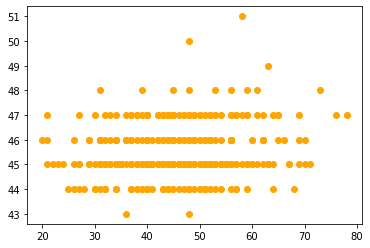

In [92]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
np.random.seed(42)

x=my_data.drop('total_runs',axis=1)
y=my_data["total_runs"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
team_encoder=venue_encoder=LabelEncoder()

model=RandomForestRegressor(min_samples_split=4,
 min_samples_leaf= 3,
 max_leaf_nodes=7,
 max_depth= 5,)


model.fit(x,y)
y_preds=model.predict(x_test).round()
mean_absolute_error(y_preds,y_test)
plt.scatter(y_test,y_preds,color="orange");




In [80]:
RandomForestRegressor().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [44]:
from sklearn.model_selection import RandomizedSearchCV

grid={
    'max_depth':[5],
    "max_leaf_nodes":[7],
    'min_samples_leaf':[3],
    'min_samples_split': [4],
    'min_weight_fraction_leaf': [0.15,0.2],
    
}
np.random.seed(42)

clf=RandomForestRegressor()
rs_clf=RandomizedSearchCV(estimator=clf,
                         param_distributions=grid,
                         n_iter=10,
                          cv=5,)

rs_clf.fit(x_train,y_train)

c:\Users\bhara\Documents\ML_projects\first-sample-project\env\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5], 'max_leaf_nodes': [7],
                                        'min_samples_leaf': [4, 3],
                                        'min_samples_split': [5, 4],
                                        'min_weight_fraction_leaf': [0.15,
                                                                     0.2]})

In [45]:
rs_clf.best_params_

{'min_weight_fraction_leaf': 0.2,
 'min_samples_split': 4,
 'min_samples_leaf': 3,
 'max_leaf_nodes': 7,
 'max_depth': 5}

In [51]:
import pickle